In [1]:
#Desarrollo del proyecto
#Por Alfredo Ricci Vásquez & Juan Andrés Urrea Niño

In [2]:
%pylab inline
from scipy.fftpack import *
from scipy.io.wavfile import *
from prettytable import PrettyTable


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Estas son las velocidades de onda en cada una de las cuerdas de una guitarra estándar.
v1=424.59
v2=318.63
v3=252.59
v4=189.29
v5=141.90
v6=106.31

#Nombre: DarLongitud
#Parámetros: nc- int. El número de la cuerda. Puede ser 1,2,3,4,5 0 6.
#Parámetros: f- double. Frecuencia a partir de la cual se determina la longitud.
#Definimos una función que recibe de parámetro un número de cuerda y una frecuencia,
#y devuelve la longitud de la cuerda.
def darLongitud(nc,f):
    v=0
    if(nc==1):
        v=v1
    if(nc==2):
        v=v2
    if(nc==3):
        v=v3
    if(nc==4):
        v=v4
    if(nc==5):
        v=v5
    if(nc==6):
        v=v6
    return v/(2*f)

In [4]:
#Se calculan las longitudes de los diferentes trastes, para poder dibujar la guitarra.
tra0=darLongitud(1,329.63)
tra1=darLongitud(1,349.23)
tra2=darLongitud(1,369.99)
tra3=darLongitud(1,392.0)
tra4=darLongitud(1,415.3)
tra5=darLongitud(1,440)
tra6=darLongitud(1,466.16)
tra7=darLongitud(1,493.88)
tra8=darLongitud(1,523.25)
tra9=darLongitud(1,554.37)
tra10=darLongitud(1,587.33)
tra11=darLongitud(1,622.25)
tra12=darLongitud(1,659.26)
tra13=darLongitud(1,698.46)

trastes=[]
i=0
while(i<14):
    trastes.append(eval("tra"+str(i)))
    i+=1

#Constantes que definen el círculo en la guitarra.
cc=0.195
rc=0.093/2

In [5]:
#Nombre: Onda
#Parámetros: t- double. El tiempo durante el cual ondula.
#Parámetros: f- double. La frecuencia a la cual osicla la onda.
#Parámetros: nc- int. La cuerda en cuestión.
#Parámetros: exi- int. 1 o 0. 1 si vibra o 0 si no vibra.
def onda(t,f,nc,exi):
    #Definición de constantes a tener en cuenta.
    l=darLongitud(nc,f)
    k=pi/(l)
    om=2*pi*f
    x=linspace(0,l,100)
    
    #Definir las condiciones que crean las vibraciones en cada cuerda.
    if(exi==1):
        A=1
    else:
        A=0
    if(nc==1):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)-0.025
        resp=append(resp,-0.025)
    if(nc==2):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)-0.015
        resp=append(resp,-0.015)
    if(nc==3):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)-0.005
        resp=append(resp,-0.005)
    if(nc==4):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)+0.005
        resp=append(resp,0.005)
    if(nc==5):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)+0.015
        resp=append(resp,0.015)
    if(nc==6):
        resp=A*0.002*e**(-50*t)*cos(om*t)*sin(k*x)+0.025
        resp=append(resp,0.025)
    x=append(x,tra0)
    return x,resp

Una vez se han definido las funciones que permiten construir las oscilaciones en las diferentes cuerdas de la guitarra, a continuación se muestra la condición de frontera que consiste en poner el dedo en un determinado punto de cada cuerda, lo que haría que un segmento oscile y otro permanezca en reposo. Con esto se comprueba el correcto funcionamiento de las funciones, de manera que a un lado del traste haya onda y al otro lado no.

(0, 0.6440402875951825)

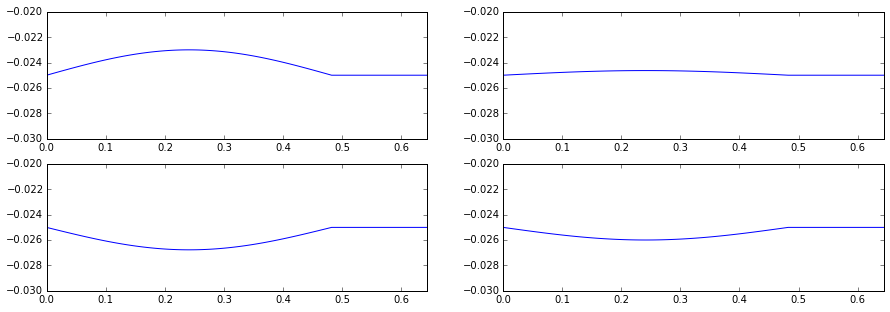

In [6]:
figure(figsize(15,5))

#Presentación en subplots de distintos casos de oscilación delimitado por el posicionamiento del dedo sobre la cuerda.
subplot(2,2,1)
equis,y=onda(0,440,1,1)
plot(equis,y)
ylim(-0.03,-0.02)
xlim(0,tra0)

subplot(2,2,2)
equis,y=onda(0.0005,440,1,1)
plot(equis,y)
ylim(-0.03,-0.02)
xlim(0,tra0)

subplot(2,2,3)
equis,y=onda(0.001,440,1,1)
plot(equis,y)
ylim(-0.03,-0.02)
xlim(0,tra0)

subplot(2,2,4)
equis,y=onda(0.0015,440,1,1)
plot(equis,y)
ylim(-0.03,-0.02)
xlim(0,tra0)

In [10]:
#Se crean los datos que se almacenan para construir la primera animación. Esta consiste en una única onda en una cuerda
i=0 #variable de iteración.
history=[] #Arreglo de datos.
while(i<0.05): #LLenar el arreglo de datos.
    equis,y=onda(i,440,1,1)
    history.append([equis,y])
    i+=0.0002 #Se define como 1 sobre 10 veces la frecuencia más alta.

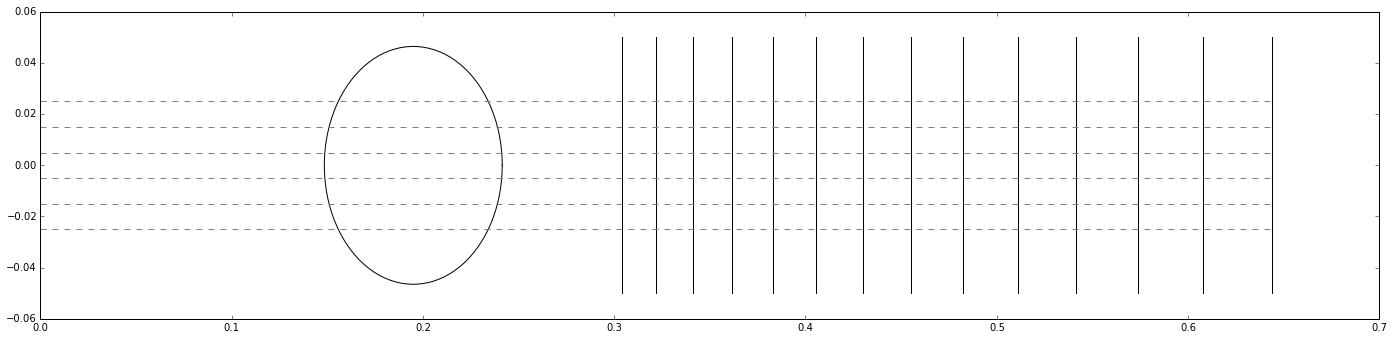

In [13]:
#Se dibuja la guitarra con sus diferentes cuerdas, trastes y el círculo de referencia.
x=linspace(0,2*pi,100)
fig2=figure(figsize(24,5.5))
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")

Una vez se ha creado el espacio donde ocurrirán las disferentes oscilaciones, la guitarra, se procede entonces a realizar las distintas animaciones de ejemplo para comprobar el correcto funcionamiento de lo desarrollado hasta ahora.

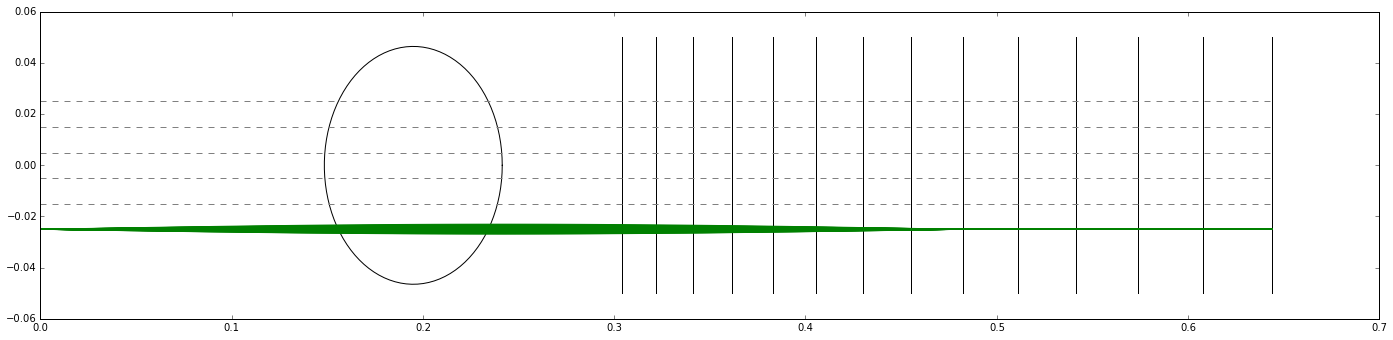

In [15]:
#Se anima la primera cuerda a manera de prueba.
figs=[]
x=linspace(0,2*pi,100)
fig2=figure(figsize(24,5.5))
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")

for i in range(len(history)):
    
    plt2, =(plot(history[i][0],history[i][1],c='green'))
    figs.append(array([plt2]))

In [16]:
#Se guarda la animación para visualización.
import matplotlib.animation as animation
anim = animation.ArtistAnimation(fig2, figs, interval=30, repeat_delay=3000,blit=True)
anim.save('1Cuerda.mp4')

In [17]:
#Nombre: Cuerda en El Tiempo
#Parámetros: A- arreglo. Contiene el tiempo de inicio de la onda, el tiempo de finalización y la frecuencia.
#parámetros: n- int. La cuerda que se hará vibrar.
#Parámetros: tif- float. El tiempo en el que finaliza toda la melodía.
def cuerdaEnElTiempo(A,n,tif):
    history=[]
    if(A!=[]):
        A0=A[:,0]
        A1=A[:,1]
        A2=A[:,2]
        intervalos=[]
        ii=0

        
        efes=0
        while(efes<len(A2)):
            i=0
            while(i<A0[0]):
                equis,y=onda(i,A2[efes],n,0)
                history.append([equis,y])
                i+=0.0002
            
            i=0 
            while(i<(A1[efes]-A0[efes])):
                equis,y=onda(i,A2[efes],n,1)
                history.append([equis,y])
                i+=0.0002
            i=0
            if(efes<(len(A2)-1)):
                while(i<(A0[efes+1]-A1[efes])):
                    equis,y=onda(i,A2[efes],n,0)
                    history.append([equis,y])
                    i+=0.0002
            efes+=1
    else:
        i=0
        while(i<tif):
            equis,y=onda(i,200,n,0)
            history.append([equis,y])
            i+=0.0002
    return history

Una vez se ha definido la función que permite definir las oscilaciones en las diferentes cuerdas a lo largo del tiempo, se procede a realizar pruebas que permitan comprobar el correcto funcionamiento de lo hecho hasta ahora.

In [191]:
#Se construye el arreglo de parámetros de tiempo inicial, final y frecuencia para probar la guitarra.
prueba=zeros((6,3))
prueba[0]=[0,0.1,440]
prueba[1]=[0.2,0.3,466.16]
prueba[2]=[0.3,0.5,493.18]
DataPrueba=cuerdaEnElTiempo(prueba,1,5)

Es importante tener en cuenta que el tiempo real no puede ser recreado, debido a que las animaciones se volverían casi imposibles de crear dedibo a la cantidad de fotogramas necesarios, hay que tener en cuenta que una frecuencia estandar es de alrededor de los 440Hz, y que para tener un buen muestreo deben haber 10 datos por oscilación, estía implicarían 4400 datos por segundo, y tal cantidad de datos es imposible de manejar a la hora de animar.

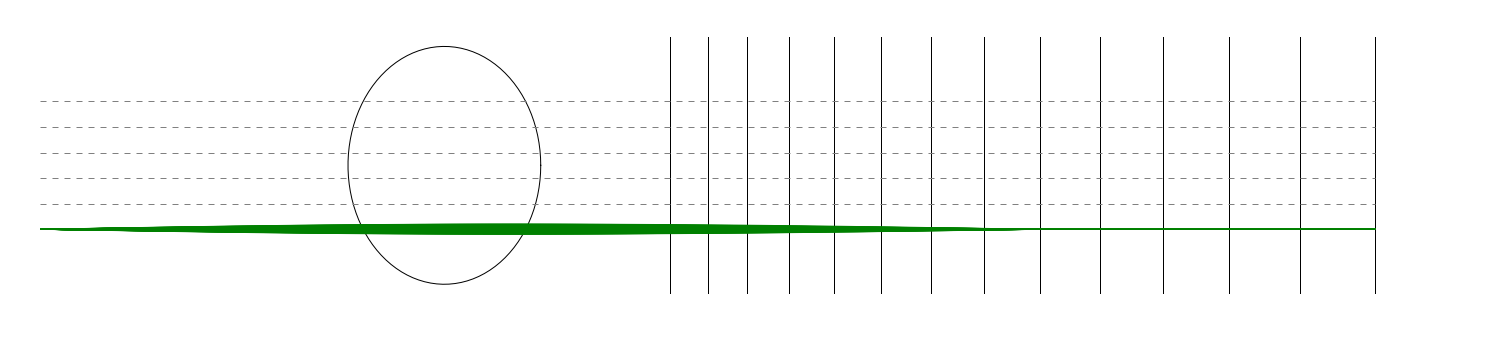

In [192]:
#Se construye la animación de la guitarra utilizando el arreglo de parámetros creado como prueba.
figs=[]
x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(DataPrueba)):
    
    plt2, =(plot(DataPrueba[i][0],DataPrueba[i][1],c='green'))
    figs.append(array([plt2]))

In [193]:
#Se guarda la animación para mejor visualización.
import matplotlib.animation as animation
anim = animation.ArtistAnimation(fig2, figs, interval=10, repeat_delay=3000,blit=True)
anim.save('1Cuerda3Notas.mp4')

In [187]:
#valores aleatorios para probar.
prueba=zeros((6,3))
prueba[0]=[0,0.1,440]
prueba[1]=[0.2,0.3,466.16]
prueba[2]=[0.3,0.4,493.18]
prueba[3]=[0.3,0.4,220]
prueba[4]=[0.4,0.5,196]
prueba[5]=[0.5,0.6,174]
DataPrueba=cuerdaEnElTiempo(prueba,1,5)

In [188]:
#Nombre: Play Guitar
#Parámetros: A- arreglo. Contiene el tiempo final de la onda, el tiempo final y su frecuencia.
#Parámetros: tr0- int. Traste inicial de la cuerda,
#Parámetros: trf- int. Traste final de la cuerda.
#Esta función crea la oscilación correspondiente a cada cuerda al separar las frecuencias por cuerda. Se asume que
#esto ocurre dentro de los trastes dados. Se genera entonces un archivo de datos para animar para cada cuerda.
def playGuitar(A,tr0,trf):
    cuerda1=[]
    cuerda2=[]
    cuerda3=[]
    cuerda4=[]
    cuerda5=[]
    cuerda6=[]
    for i in range(len(A[:,2])):
        long1=darLongitud(1,A[i,2])
        print(long1)
        long2=darLongitud(2,A[i,2])
        long3=darLongitud(3,A[i,2])
        print(long3)
        print(eval("tra"+str(tr0)))
        print(eval("tra"+str(trf)))
        long4=darLongitud(4,A[i,2])
        long5=darLongitud(5,A[i,2])
        long6=darLongitud(6,A[i,2])
        if(long1>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long1<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda1.append(A[i])
        if(long2>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long2<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda2.append(A[i])
        if(long3>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long3<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda3.append(A[i])
        if(long4>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long4<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda4.append(A[i])
        if(long5>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long5<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda5.append(A[i])
        if(long6>((eval("tra"+str(trf)))-0.01*(eval("tra"+str(trf))))and long6<((eval("tra"+str(tr0)))+0.01*(eval("tra"+str(tr0))))):
            cuerda6.append(A[i])
    history1=cuerdaEnElTiempo(array(cuerda1),1,A[(len(A)-1),1])
    history2=cuerdaEnElTiempo(array(cuerda2),2,A[(len(A)-1),1])
    history3=cuerdaEnElTiempo(array(cuerda3),3,A[(len(A)-1),1])
    history4=cuerdaEnElTiempo(array(cuerda4),4,A[(len(A)-1),1])
    history5=cuerdaEnElTiempo(array(cuerda5),5,A[(len(A)-1),1])
    history6=cuerdaEnElTiempo(array(cuerda6),6,A[(len(A)-1),1])
    
    return (history1,history2,history3,history4,history5,history6)

0.482488636364
0.287034090909
0.5111846857693233
0.40572384137601525
0.455412304788
0.270926291402
0.5111846857693233
0.40572384137601525
0.430461494789
0.256082971734
0.5111846857693233
0.40572384137601525
0.964977272727
0.574068181818
0.5111846857693233
0.40572384137601525
1.0831377551
0.644362244898
0.5111846857693233
0.40572384137601525
1.2200862069
0.725833333333
0.5111846857693233
0.40572384137601525


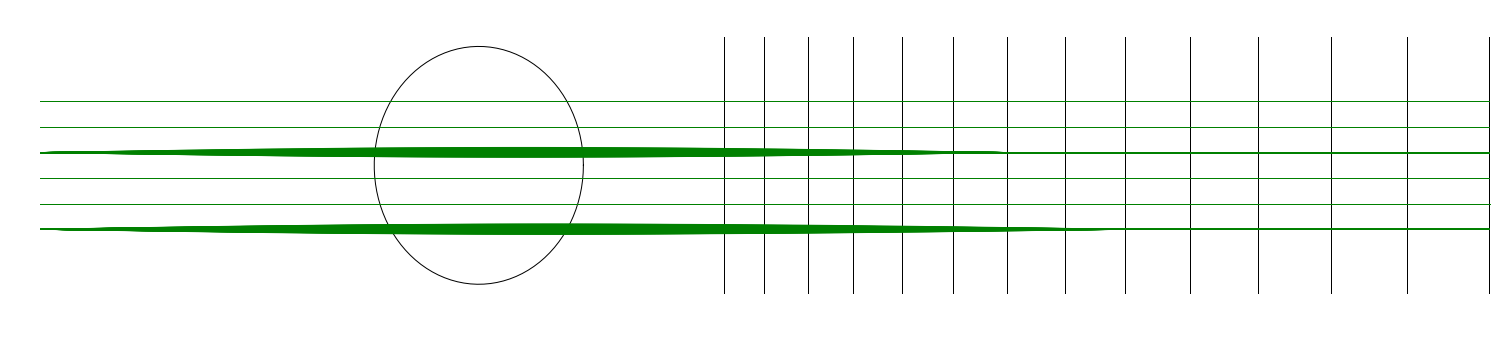

In [189]:
#Se realiza una animación que permita visualizar la vibración de las 6 cuerdas.
h1,h2,h3,h4,h5,h6=playGuitar(prueba,4,8)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
cc=0.195
rc=0.093/2
plot(rc*cos(x)+cc,rc*sin(x),c="black")
xlim(0, tra0+0.001)
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-1):
    
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [190]:
#Se guarda la animación realizada para visualizar el resultado.
import matplotlib.animation as animation
anim = animation.ArtistAnimation(fig2, figs, interval=10, repeat_delay=3000,blit=True)
anim.save('6Cuerda6Notas.mp4',dpi=60)

#Análisis de Frecuencias
##Construción de Funciones

En esta seción se construyen las funciones sobre las cuales se basa todo el estudio de las frecuencias contenidas en los archivos de audio utilizados. Primero, se establacen las constantes que serán modificadas cada vez que las funciones se empleen sobre un archivo **.wav** distinto. Luego, se construyen como tal las funciones **leer()** y **fourier**, las cuales permiten obtener el arreglo de enteros de tipo int16 del archivo de audio y su frecuencia de muestreo, con **leer()**, y obtener la respectiva transformada de Fourier en el dominio de la Frecuencia de este arreglo y las frecuencias asociadas, con **fourier()**.

In [29]:
#Algunas constantes que serán modificadas por las funciones.
sampling = 0 #La frecuencia de muestreo del archivo de audio analizado. (Tipo= int)
dt = 0 #El diferencial de tiempo que define el menor salto de tiempo en el archivo. (Tipo = int)
N = 0 #La cantidad de datos en el archivo de audio. (Tipo = int)
t = []

In [30]:
#Nombre: Leer
#Parámetros: archivo- El nombre completo del archivo, junto con la extensión .wav.
#Parámetros: graficar- Booleano. De ser True, grafica los datos obtenidos del archivo importado.
#Este método importa un archivo escrito como .wav, para luego retornar un arreglo que contiene todos los datos
#contenidos en dicho archivo, la frecuencia de sampling del archivo .wav y el arreglo de duración temporal propio.
def leer(archivo):
    global sampling
    global t
    global N
    datosGeneral = read(archivo)
    original = datosGeneral[1]
    sampling = datosGeneral[0]
    N = len(original)
    t = linspace(0, N*(1/sampling), N)
    return array([original, sampling, t])

In [31]:
#Nombre: Fourier
#Parámetros: archivo- El nombre del archivo generado por la función Leer.
#Este método recibe un archivo que contiene los datos de un .wav y retorna un arreglo de dos elementos:
#el primero es la transformada discreta de Fourier y el segundo son las frecuencias asociadas.
def fourier(archivo2):
    global sampling
    global dt
    global N
    transformada = fft(archivo2)
    dt = 1/sampling
    frecuencias = fftfreq(N,dt)
    final = array([frecuencias, abs(transformada)])
    return final

In [1]:
#Nombre: Graf
#Parámetros: x,y -arreglos. Los arreglos a ser graficados sobre el eje correspondiente.
#Parámetros: labelX -String entre comillas. El label del eje X
#Esta función permite crear un scatter plot de los datos dados en los arreglos de parámetro.
def graf(x,y,labelX):
    figure(figsize=(7,5))
    scatter(x,y,s=2)
    xlim(-10000,10000)
    xlabel(labelX)

##Ejecución de Análisis
En esta sección se emplean las funciones definidas previamente para determinar las frecuencias fundamentales en el archivo de audio utilizado.
###Audio de Una Nota
Para una prueba inicial, se utiliza un archivo de audio obtenido al grabar una guitarra tocando la nota LA, la cual tiene una frecuencia teórica de 440Hz.

In [2]:
prueba1 = leer("A440.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba1[0] #El arreglo que define el archivo de audio.
tiempo = prueba1[2]

figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

NameError: name 'leer' is not defined

A continuación, y contando ya con el arreglo de enteros de tipo int16 que define el archivo de audio, se procede a trasladarlos al dominio de la frecuencia, de manera que sea posible determinar la frecuencia fundamental que caracteriza el audio.

In [34]:
trans = fourier(arregloMusical)[1] #Los datos transformados por la función fourier()
freq = fourier(arregloMusical)[0] #Las frecuencias asociadas.

maximo = max(trans) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
for i in range(len(trans)):
    if(trans[i] == maximo):
        frecuencia = np.round(freq[i], 3)
        print("Frecuencia Fundamental: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental: 440.971 Hz


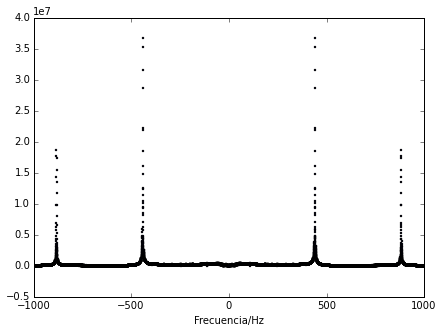

In [35]:
graf(freq, trans, "Frecuencia/Hz") #Visualización de las frecuencias.

In [119]:
#Creación de la matriz de tiempos y frecuencias
result = zeros((1,3))
result[0,0] = 0.1
result[0,1] = 0.3
result[0,2] = 440.971
print(result)

[[  1.00000000e-01   3.00000000e-01   4.40971000e+02]]


[array([  1.00000000e-01,   3.00000000e-01,   4.40971000e+02])]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
26

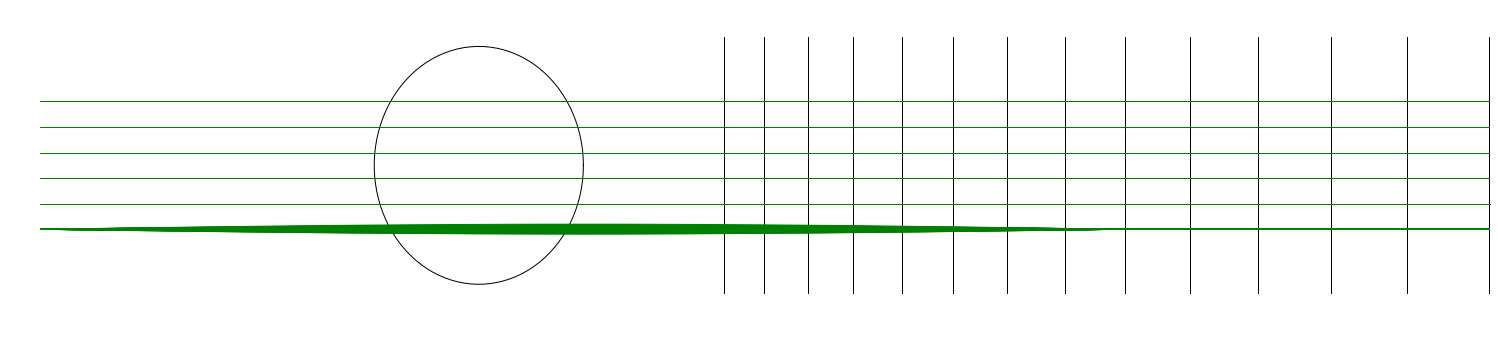

In [120]:
h1,h2,h3,h4,h5,h6=playGuitar(result,4,8)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
xlim(0, tra0+0.001)
cc=0.195
rc=0.093/2
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-2):

    print(i)
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [99]:
print(len(h1))

1500


In [121]:
anim = animation.ArtistAnimation(fig2, figs, interval=1, repeat_delay=3000,blit=True)
anim.save('1NotaReal.mp4',dpi=70)

###Audio de 2 Notas separadas
Ahora se analizará un archivo de audio que contiene un pulso compuesto de dos notas, A de 440Hz y A de 220Hz.

Duración: 8.083 segundos


/Users/AlfredoRicci/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


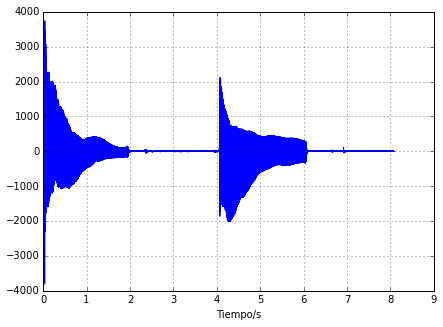

In [37]:
prueba2 = leer("A440then220.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba2[0] #El arreglo que define el archivo de audio.
tiempo = prueba2[2]

figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

Para realizar el análisis de las dos notas en el tiempo resulta necesario dividir el arreglo que define el archivo de audio en dos arreglos, de manera que cada uno contenga cada nota tocada.

####Primera Nota

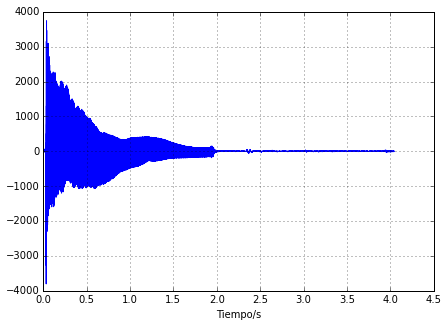

In [38]:
#División de arreglos
newArray1 = arregloMusical[0:N/2]
newTime1 = tiempo[0:N/2]

figure(figsize=(7,5))
plot(newTime1, newArray1)
xlabel("Tiempo/s")
grid(True)

In [39]:
#Análisis de Fourier
N = len(newArray1) #Actualizar el valor de N según el nuevo arreglo
trans = fourier(newArray1)[1] #Los datos transformados por la función fourier()
freq = fourier(newArray1)[0] #Las frecuencias asociadas.

maximo = max(trans) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
for i in range(len(trans)):
    if(trans[i] == maximo):
        frecuencia = np.round(freq[i], 3)
        print("Frecuencia Fundamental de la primera nota: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental de la primera nota: 441.146 Hz


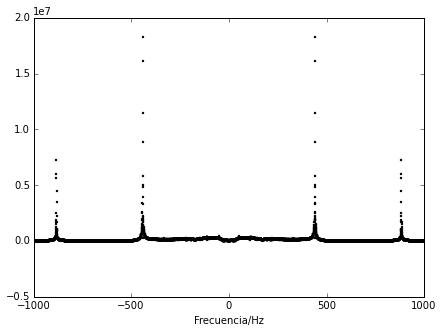

In [40]:
graf(freq, trans, "Frecuencia/Hz") #Visualización de las frecuencias.

####Segunda Nota

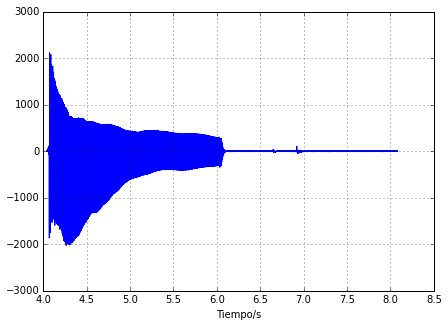

In [41]:
#División de arreglos
N = len(arregloMusical)
newArray2 = arregloMusical[N/2:-1]
newTime2 = tiempo[N/2:-1]

figure(figsize=(7,5))
plot(newTime2, newArray2)
xlabel("Tiempo/s")
grid(True)

In [42]:
#Análisis de Fourier
N = len(newArray2) #Actualizar el valor de N según el nuevo arreglo
trans2 = fourier(newArray2)[1] #Los datos transformados por la función fourier()
freq2 = fourier(newArray2)[0] #Las frecuencias asociadas.

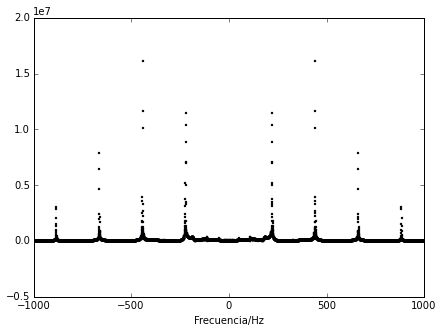

In [43]:
graf(freq2, trans2, "Frecuencia/Hz") #Visualización de las frecuencias.

Debido a que se está analizando la misma nota pero con distinta frecuencia, se debe tomar este arreglo de transformadas y frecuencias y filtrarlo de manera que ya no se tome en cuenta la frecuencia hallada anteriormente.

In [44]:
#Filtrado
transF = []
freqF = []
limF = 1*10**7
for i in range(len(trans2)):
    if(trans2[i] < limF):
        transF.append(trans2[i])
        freqF.append(freq2[i])

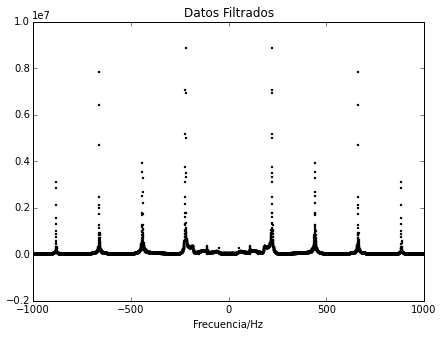

In [45]:
graf(freqF, transF, "Frecuencia/Hz") #Visualización de las frecuencias
title("Datos Filtrados")

Sobre este nuevo arreglo ya es posible encontrar la frecuencia fundamental, pues ya se omite la que se halló anteriormente para la misma nota.

In [46]:
#Análisis de Fourier
maximo = max(transF) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
for i in range(len(transF)):
    if(transF[i] == maximo):
        frecuencia = np.round(freqF[i], 3)
        print("Frecuencia Fundamental de la segunda nota: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental de la segunda nota: 221.193 Hz


In [47]:
tabla = PrettyTable(["Nota","Frecuencia Fundamental(Hz)", "Duración(s)"])
tabla.add_row(["La", 441.146, 2])
tabla.add_row(["La", 221.193, 2])
print("Tabla 1: Frecuencias Fundamentales para dos La's")
print(tabla)

Tabla 1: Frecuencias Fundamentales para dos La's
+------+----------------------------+-------------+
| Nota | Frecuencia Fundamental(Hz) | Duración(s) |
+------+----------------------------+-------------+
|  La  |          441.146           |      2      |
|  La  |          221.193           |      2      |
+------+----------------------------+-------------+


En la tabla 1 pueden observarse las dos frecuencias fundamentales obtenidas que definen las dos notas tocadas a lo largo del tiempo. Dado que la primera nota se toca durante 2 segundos, hay una pausa de 2 segundos y luego la siguiente se toca durante 2 segundos para terminar con un silencio de 2 segundos, es posible entonces entender que cada frecuencia se toca durante 2 segundos, con un intervalo de silencio de 2 segundos entre ellas. Este hecho se utilizará para la simulación de la guitarra. A continuación se genera la matriz de tiempos y frecuencias para este fin.

In [170]:
result = zeros((2,3))
result[0][0] = 0.05
result[0][1] = 0.2
result[0][2] = 441.146
result[1][0] = 0.4
result[1][1] = 0.6
result[1][2] = 221.193
result

array([[  5.00000000e-02,   2.00000000e-01,   4.41146000e+02],
       [  4.00000000e-01,   6.00000000e-01,   2.21193000e+02]])

0.481235237314
0.286288439655
0.6440402875951825
0.42985138090224345
0.959772687201
0.570971956617
0.6440402875951825
0.42985138090224345
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242


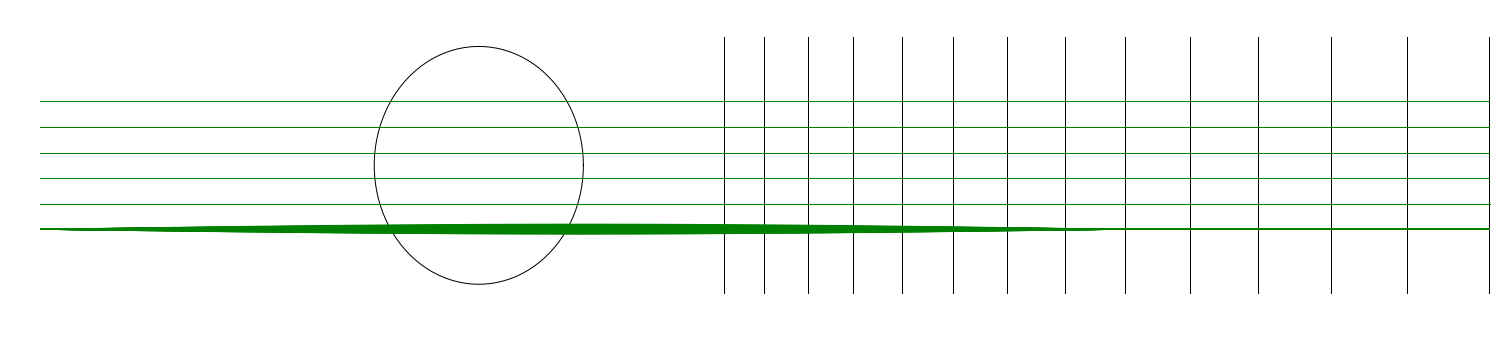

In [156]:
h1,h2,h3,h4,h5,h6=playGuitar(result,0,7)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
xlim(0, tra0+0.001)
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-2):

    print(i)
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [137]:
anim = animation.ArtistAnimation(fig2, figs, interval=10, repeat_delay=3000,blit=True)
anim.save('2NotasReal.mp4',dpi=70)

###Escala de Notas 

Duración: 34.177 segundos


/Users/AlfredoRicci/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


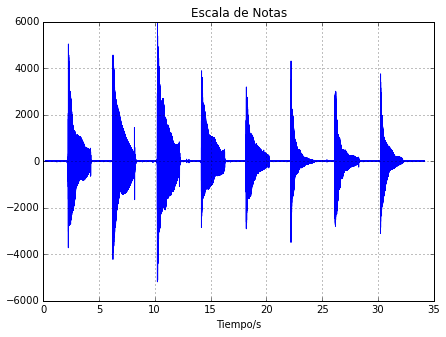

In [49]:
prueba2 = leer("Am-scale.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba2[0] #El arreglo que define el archivo de audio.
tiempo = prueba2[2]

figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
title("Escala de Notas")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

Para realizar el estudio de la escala de notas contenida en el archivo de audio, se debe entonces considerar que existe un avance en el tiempo a medida que estas se tocan, por lo que es necesario dividir el arreglo de datos original en 8 arreglos, cada uno conteniendo una de las notas tocadas.

In [50]:
#División del arreglo de datos
arreglo1 = arregloMusical[0:N/8]
arreglo2 = arregloMusical[N/8:2*N/8]
arreglo3 = arregloMusical[2*N/8:3*N/8]
arreglo4 = arregloMusical[3*N/8:4*N/8]
arreglo5 = arregloMusical[4*N/8:5*N/8]
arreglo6 = arregloMusical[5*N/8:6*N/8]
arreglo7 = arregloMusical[6*N/8:7*N/8]
arreglo8 = arregloMusical[7*N/8:N]

#División del arreglo de tiempos
time1 = tiempo[0:N/8]
time2 = tiempo[N/8:2*N/8]
time3 = tiempo[2*N/8:3*N/8]
time4 = tiempo[3*N/8:4*N/8]
time5 = tiempo[4*N/8:5*N/8]
time6 = tiempo[5*N/8:6*N/8]
time7 = tiempo[6*N/8:7*N/8]
time8 = tiempo[7*N/8:N]

Visualizar las notas de manera separada


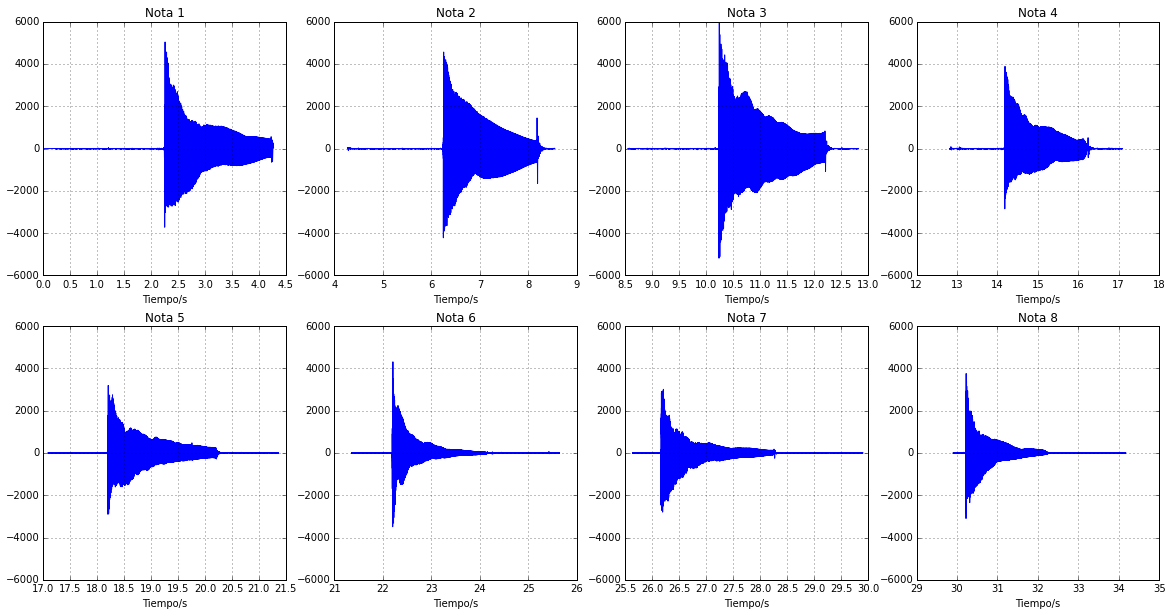

In [51]:
#Visualizaciones
figure(figsize=(20,10))
subplot2grid((2,4), (0,0), colspan = 1, rowspan = 1)
plot(time1, arreglo1)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 1")
subplot2grid((2,4), (0,1), colspan = 1, rowspan = 1)
plot(time2, arreglo2)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 2")
subplot2grid((2,4), (0,2), colspan = 1, rowspan = 1)
plot(time3, arreglo3)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 3")
subplot2grid((2,4), (0,3), colspan = 1, rowspan = 1)
plot(time4, arreglo4)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 4")
subplot2grid((2,4), (1,0), colspan = 1, rowspan = 1)
plot(time5, arreglo5)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 5")
subplot2grid((2,4), (1,1), colspan = 1, rowspan = 1)
plot(time6, arreglo6)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 6")
subplot2grid((2,4), (1,2), colspan = 1, rowspan = 1)
plot(time7, arreglo7)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 7")
subplot2grid((2,4), (1,3), colspan = 1, rowspan = 1)
plot(time8, arreglo8)
grid(True)
ylim(-6000,6000)
xlabel("Tiempo/s")
title("Nota 8")
print("Visualizar las notas de manera separada")

In [52]:
#Análisis de Frecuencias
N = len(arreglo2) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo2)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo2)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la segunda nota: " + str(frecuencia) + " Hz")
        break
        
N = len(arreglo3) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo3)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo3)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la tercera nota: " + str(frecuencia) + " Hz")
        break

N = len(arreglo4) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo4)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo4)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la cuarta nota: " + str(frecuencia) + " Hz")
        break
        
N = len(arreglo5) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo5)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo5)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la quinta nota: " + str(frecuencia) + " Hz")
        break

N = len(arreglo6) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo6)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo6)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la sexta nota: " + str(frecuencia) + " Hz")
        break

N = len(arreglo7) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo7)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo7)[0] #Las frecuencias asociadas.
maximoA = max(transA) #El máximo valor de las transformadas.

for i in range(len(transA)):
    if(transA[i] == maximoA):
        frecuencia = np.round(freqA[i], 3)
        print("Frecuencia Fundamental de la séptima nota: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental de la segunda nota: 247.887 Hz
Frecuencia Fundamental de la tercera nota: 262.869 Hz
Frecuencia Fundamental de la cuarta nota: 293.766 Hz
Frecuencia Fundamental de la quinta nota: 329.347 Hz
Frecuencia Fundamental de la sexta nota: 349.476 Hz
Frecuencia Fundamental de la séptima nota: 391.378 Hz


Con el bloque de código anterior se obtienen las frecuencias fundamentales de todas las notas excepto la primera y la última. Estos valores serán luego referenciados una vez se obtengan las frecuencias de la primera y última nota de la escala.

####Nota:
Por errores en la grabación de los archivos de audio, la nota La, que debería ser de 440Hz y 220Hz dependiendo de como se tocó, siempre presentaba la presencia de frecuencias distintas y notablemente significativas, por lo que resulta necesario limpiar el archivo de transformadas para poder determinar la verdadera frecuencia fundamental. Por este motivo esta limpieza se realiza con la primera y última nota de la escala analizada.

In [53]:
#Limpiar primera nota
N = len(arreglo1) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo1)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo1)[0] #Las frecuencias asociadas.

nuevoTrans = []
nuevoFreq = []
lim = 2.5*10**7
for i in range(len(transA)):
    if(transA[i] < lim):
        nuevoTrans.append(transA[i])
        nuevoFreq.append(freqA[i])

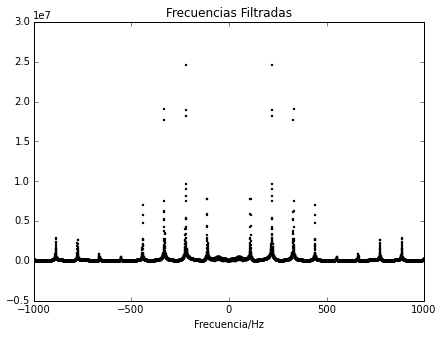

In [54]:
graf(nuevoFreq, nuevoTrans, "Frecuencia/Hz")
title("Frecuencias Filtradas")

In [55]:
#Hallar frecuencia fundamental
maximoA = max(nuevoTrans)
for i in range(len(nuevoTrans)):
    if(nuevoTrans[i] == maximoA):
        frecuencia = np.round(nuevoFreq[i], 3)
        print("Frecuencia Fundamental de la primera nota de la escala: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental de la primera nota de la escala: 221.203 Hz


In [56]:
#Limpiar la última nota
N = len(arreglo8) #Actualizar el valor de N según el nuevo arreglo
transA = fourier(arreglo8)[1] #Los datos transformados por la función fourier()
freqA = fourier(arreglo8)[0] #Las frecuencias asociadas.

nuevoTrans = []
nuevoFreq = []
lim = 0.5*10**7
for i in range(len(transA)):
    if(transA[i] < lim):
        nuevoTrans.append(transA[i])
        nuevoFreq.append(freqA[i])

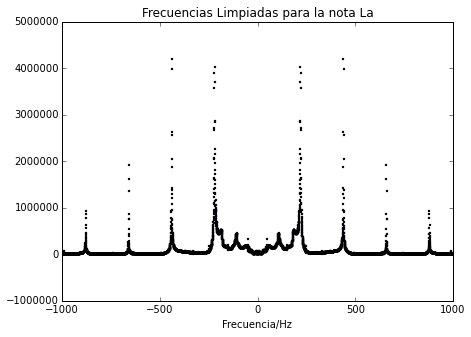

In [57]:
#Visualizar las frecuencias limpiadas
graf(nuevoFreq, nuevoTrans, "Frecuencia/Hz")
title("Frecuencias Limpiadas para la nota La")

In [58]:
#hallar frecuencia fundamental
maximoA = max(nuevoTrans)
for i in range(len(nuevoTrans)):
    if(nuevoTrans[i] == maximoA):
        frecuencia = np.round(nuevoFreq[i], 3)
        print("Frecuencia Fundamental de la última nota de la escala: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental de la última nota de la escala: 439.361 Hz


In [59]:
tabla3 = PrettyTable(["Nota","Frecuencia Fundamental(Hz)", "Duración(s)"])
tabla3.add_row(["A", 221.203, 2])
tabla3.add_row(["B", 247.887, 2])
tabla3.add_row(["C", 262.869, 2])
tabla3.add_row(["D", 293.766, 2])
tabla3.add_row(["E", 329.347, 2])
tabla3.add_row(["F", 349.476, 2])
tabla3.add_row(["G", 391.378, 2])
tabla3.add_row(["A", 439.361, 2])
print("Tabla 2: Frecuencias fundamentales para la escala")
print(tabla3)

Tabla 2: Frecuencias fundamentales para la escala
+------+----------------------------+-------------+
| Nota | Frecuencia Fundamental(Hz) | Duración(s) |
+------+----------------------------+-------------+
|  A   |          221.203           |      2      |
|  B   |          247.887           |      2      |
|  C   |          262.869           |      2      |
|  D   |          293.766           |      2      |
|  E   |          329.347           |      2      |
|  F   |          349.476           |      2      |
|  G   |          391.378           |      2      |
|  A   |          439.361           |      2      |
+------+----------------------------+-------------+


Una vez se han presentado los datos obtenidos de manera estética al usuario, se constuye el arreglo bidimensional que se utilizará como parámetro de entrada para simular la guitarra tocando este archivo de audio. Se tiene en cuenta entonces el intervalo de silencio de 2 segundos presente entre la ejecución de cada nota.

In [172]:
#Creación de la matriz de tiempos y frecuencia
result = zeros((8,3))
result[0][0] = 0.05
result[0][1] = 0.1
result[0][2] = 221.203
result[1][0] = 0.15
result[1][1] = 0.2
result[1][2] = 247.887
result[2][0] = 0.25
result[2][1] = 0.30
result[2][2] = 262.869
result[3][0] = 0.35
result[3][1] = 0.4
result[3][2] = 293.766
result[4][0] = 0.45
result[4][1] = 0.5
result[4][2] = 329.347
result[5][0] = 0.55
result[5][1] = 0.6
result[5][2] = 349.476
result[6][0] = 0.65
result[6][1] = 0.7
result[6][2] = 391.378 
result[7][0] = 0.75
result[7][1] = 0.8
result[7][2] = 439.361 
result

array([[  5.00000000e-02,   1.00000000e-01,   2.21203000e+02],
       [  1.50000000e-01,   2.00000000e-01,   2.47887000e+02],
       [  2.50000000e-01,   3.00000000e-01,   2.62869000e+02],
       [  3.50000000e-01,   4.00000000e-01,   2.93766000e+02],
       [  4.50000000e-01,   5.00000000e-01,   3.29347000e+02],
       [  5.50000000e-01,   6.00000000e-01,   3.49476000e+02],
       [  6.50000000e-01,   7.00000000e-01,   3.91378000e+02],
       [  7.50000000e-01,   8.00000000e-01,   4.39361000e+02]])

0.959729298427
0.570946144492
0.6440402875951825
0.45541230478805556
0.856418448729
0.509486177169
0.6440402875951825
0.45541230478805556
in
0.807607591614
0.480448436293
0.6440402875951825
0.45541230478805556
in
0.72266702069
0.429917008776
0.6440402875951825
0.45541230478805556
in
0.644593696011
0.383470928838
0.6440402875951825
0.45541230478805556
in
0.607466607149
0.361383900468
0.6440402875951825
0.45541230478805556
in
0.542429569368
0.322693150867
0.6440402875951825
0.45541230478805556
0.483190360546
0.287451548954
0.6440402875951825
0.45541230478805556
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


IndexError: list index out of range

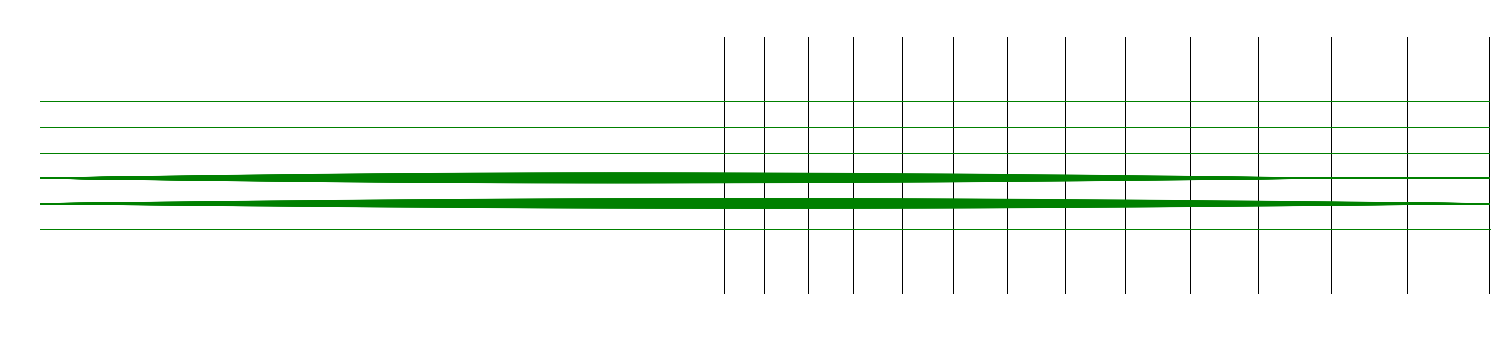

In [174]:
h1,h2,h3,h4,h5,h6=playGuitar(result,0,8)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
xlim(0, tra0+0.001)
#plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-2):

    print(i)
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [175]:
anim = animation.ArtistAnimation(fig2, figs, interval=10, repeat_delay=3000,blit=True)
anim.save('EscalaAm.mp4',dpi=50)

###Audio de Dos Pulsos de Dos Notas
Para continuar con la prueba del sistema de análisis de audio construido, se utilizará ahora un archivo de audio obtenido de grabar una guitarra tocando primero las notas G y B juntas, para después de 2 segundos tocar D y F juntas.

Duración: 10.36 segundos


/Users/AlfredoRicci/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


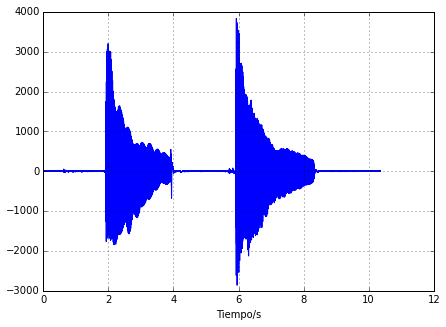

In [61]:
prueba1 = leer("G&BthenD&F.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba1[0] #El arreglo que define el archivo de audio.
tiempo = prueba1[2]
figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

Para realizar un análisis correcto de este archivo de audio utilizando la transformada de Fourier, es necesario dividir el arreglo que define este audio en 2 arreglos, cada uno conteniendo los pulsos que se observan en la figura anterior. De esta forma será posible determinar las dos frecuencias fundamentales que definen las notas que deben tocarse en cada pulso. Para hacer esta división, se tiene en cuenta que hubo una separación temporal de 2 segundos entre cada pulso de 2 notas, por lo que se toma el número de datos N y se construyen dos arreglos; uno que vaya del dato inicial hasta el de la mitad, y otro que vaya de ese hasta el último.

####Primer Pulso

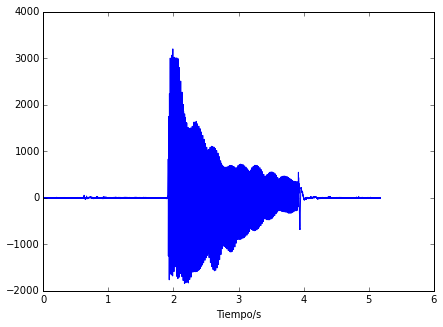

In [62]:
group1 = arregloMusical[0:N/2]
time1 = tiempo[0:N/2]

figure(figsize=(7,5))
plot(time1, group1)
xlabel("Tiempo/s")

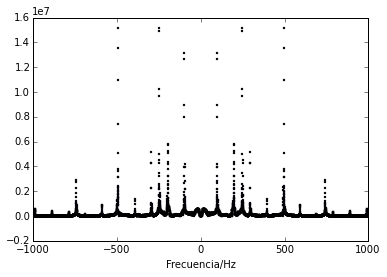

In [63]:
N = len(group1) #Actualizar el valor de N después de dividir los arreglos.
trans1 = fourier(group1)[1]#Los datos transformados por la función fourier()
freq1 = fourier(group1)[0] #Las frecuencias asociadas.

maximo = max(trans1) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
frecuencias = []
#Hallar primer máximo
for i in range(len(trans1)):
    if(trans1[i] == maximo):
        frecuencias.append(abs(freq1[i]))
        break

scatter(freq1, trans1, s = 2)
xlim(-1000,1000)
xlabel("Frecuencia/Hz")

Ya que en este caso se busca hallar 2 frecuencias fundamentales, se utilizará primero el arreglo en el dominio de la frecuencia obtenido para determinar la primera frecuencia fundamental. Luego, se creará un nuevo arreglo donde se eliminen los máximos que definían esa frecuencia, de manera que los nuevos máximos sean los de la segunda frecuencia fundamental.

In [64]:
#Para hallar la primera frecuencia fundamental, simplemente se busca la frecuencia asociada al máximo del
#arreglo de datos transformados. Se utiliza el break para hacer más eficiente el proceso.
frecuencia = []
maximo = max(trans1)
for i in range(len(trans1)):
    if(trans1[i] == maximo):
        frecuencia.append(freq1[i])
        break

In [65]:
#Se crea un nuevo arreglo que ya no contenga los datos máximos asociados a la frecuencia fndamental ya hallada,
#de manera que el nuevo máximo esté asociado a la segunda drecuencia fundamental.
lim = 1.3*10**7 #Límite de corte
nuevoArreglo2 = []
newFreq2 = []
for i in range(len(trans1)):
    if(trans1[i] < lim):
        nuevoArreglo2.append(trans1[i])
        newFreq2.append(freq1[i])

In [66]:
#Similar a como se halló la primera frecuencia fundamental, se halla la segunda asociando una frecuencia a el máximo
#del arreglo de datos transformados. Esta y la anterior se guardan en el arreglo frecuencia.
maximo2 = max(nuevoArreglo2)
for i in range(len(nuevoArreglo2)):
    if(nuevoArreglo2[i] == maximo2):
        frecuencia.append(newFreq2[i])
        break

In [67]:
frecuencia1 = np.round(frecuencia[0],3) #Presentación aproximada de frecuencias obtenidas a 3 decimales.
frecuencia2 = np.round(frecuencia[1],3)
print("Las frecuencias fundamentales son: " + str(frecuencia1) + " Hz y " + str(frecuencia2) + " Hz")

Las frecuencias fundamentales son: 496.15 Hz y 97.879 Hz


####Segundo Pulso

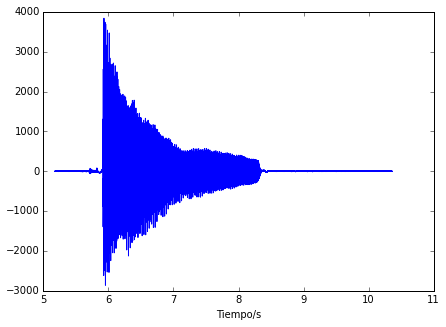

In [68]:
group2 = arregloMusical[N:-1] #Realizar el corte del arreglo inicial de datos.
time2 = tiempo[N:-1]
figure(figsize=(7,5))
plot(time2, group2)
xlabel("Tiempo/s")

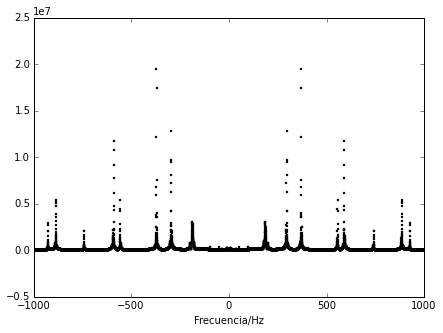

In [69]:
N = len(group2) #Actualizar N según el nueo arreglo.
trans2 = fourier(group2)[1] #Los datos transformados por la función fourier()
freq2 = fourier(group2)[0] #Las frecuencias asociadas.

maximoB = max(trans2) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
#Hallar primer máximo
for i in range(len(trans2)):
    if(trans2[i] == maximoB):
        frecuencias.append(abs(freq2[i]))
        break

graf(freq2, trans2, "Frecuencia/Hz")#Visualización de frecuencias

In [70]:
#Para hallar la primera frecuencia fundamental, simplemente se busca la frecuencia asociada al máximo del
#arreglo de datos transformados. Se utiliza el break para hacer más eficiente el proceso.
frecuencias = []
maximoQ = max(trans2)
for i in range(len(trans2)):
    if(trans2[i] == maximoQ):
        frecuencias.append(freq2[i])
        break

In [71]:
lim = 1.5*10**7 #Límite de corte
nuevoArreglo2 = []
newFreq2 = []
for i in range(len(trans2)):
    if(trans2[i] < lim):
        nuevoArreglo2.append(trans2[i])
        newFreq2.append(freq2[i])

In [72]:
maximo2 = max(nuevoArreglo2)
for i in range(len(nuevoArreglo2)):
    if(nuevoArreglo2[i] == maximo2):
        frecuencias.append(newFreq2[i])
        break

In [73]:
frecuencia1 = np.round(frecuencias[0],3) #Presentación aproximada de las frecuencias obtenidas a 3 decimales.
frecuencia2 = np.round(frecuencias[1],3)
print("Las frecuencias fundamentales son: " + str(frecuencia1) + "Hz y " + str(frecuencia2) + " Hz")

Las frecuencias fundamentales son: 370.666Hz y 295.568 Hz


In [74]:
tabla2 = PrettyTable(["Pulso","Nota","Frecuencia Fundamental(Hz)", "Duración(s)"])
tabla2.add_row([1, "B", 496.15, 2])
tabla2.add_row([1, "G", 97.879, 2])
tabla2.add_row([2, "F#" , 370.666, 2])
tabla2.add_row([2, "D" , 295.568, 2])
print("Tabla 3: Frecuencias fundamentales para dos pulsos de 2 notas")
print(tabla2)

Tabla 3: Frecuencias fundamentales para dos pulsos de 2 notas
+-------+------+----------------------------+-------------+
| Pulso | Nota | Frecuencia Fundamental(Hz) | Duración(s) |
+-------+------+----------------------------+-------------+
|   1   |  B   |           496.15           |      2      |
|   1   |  G   |           97.879           |      2      |
|   2   |  F#  |          370.666           |      2      |
|   2   |  D   |          295.568           |      2      |
+-------+------+----------------------------+-------------+


En la tabla 2 pueden observarse las frecuencias fundamentales contenidas en los diferentes pulsos estudiados, al igual que la nota a la que corresponden. Dado que cada pulso dura 2 segundos y entre ellos existe un intervalo de silencio de 2 segundos que los separa, esta información de frecuencia tocada a lo largo del tiempo se utilizará para la simulación de la guitarra. A continuación se genera la matriz de tiempos y frecuencias que se da como parámetro para realizar la simulación de la guitarra.

In [180]:
result = zeros((4,3))
result[0][0] = 0.1
result[0][1] = 0.2
result[0][2] = 496.15
result[1][0] = 0.1
result[1][1] = 0.2
result[1][2] = 97.879
result[2][0] = 0.3
result[2][1] = 0.4
result[2][2] = 370.666
result[3][0] = 0.3
result[3][1] = 0.4
result[3][2] = 295.568 
result

array([[  1.00000000e-01,   2.00000000e-01,   4.96150000e+02],
       [  1.00000000e-01,   2.00000000e-01,   9.78790000e+01],
       [  3.00000000e-01,   4.00000000e-01,   3.70666000e+02],
       [  3.00000000e-01,   4.00000000e-01,   2.95568000e+02]])

0.427884712285
0.254550035272
0.6440402875951825
0.36145778352885083
2.16895350382
1.29031763708
0.6440402875951825
0.36145778352885083
0.572739339459
0.340724533677
0.6440402875951825
0.36145778352885083
in
0.71826111081
0.427295918367
0.6440402875951825
0.36145778352885083
in
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207

IndexError: list index out of range

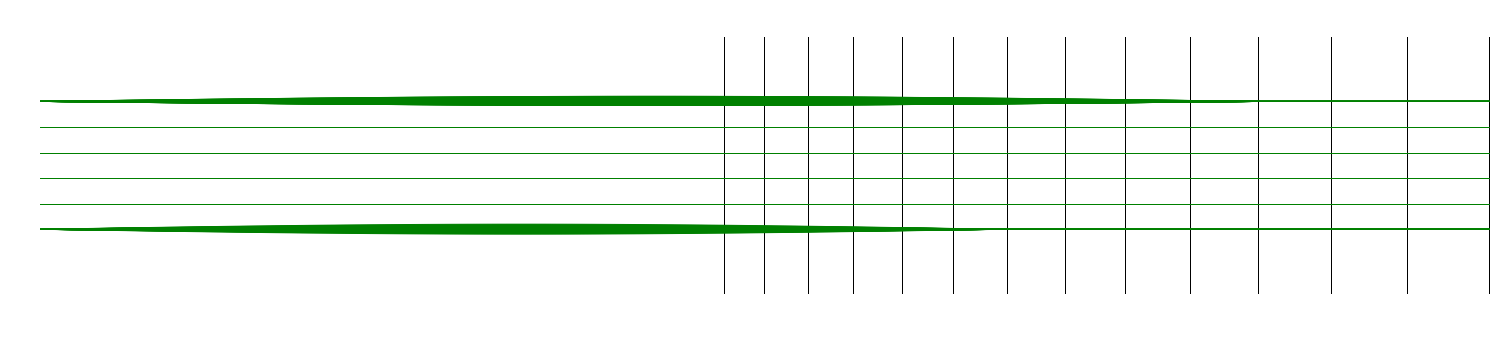

In [182]:
h1,h2,h3,h4,h5,h6=playGuitar(result,0,10)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
xlim(0, tra0+0.001)
#plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-2):

    print(i)
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [183]:
anim = animation.ArtistAnimation(fig2, figs, interval=10, repeat_delay=3000,blit=True)
anim.save('2Pulsos2NotasReal.mp4',dpi=60)

##Acorde 

Duración: 4.384 segundos


/Users/AlfredoRicci/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


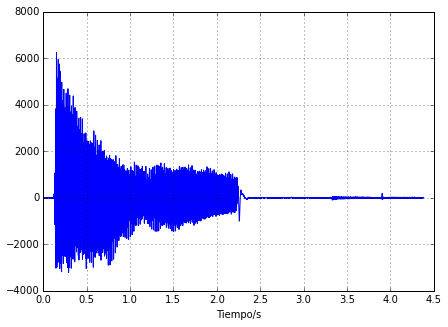

In [76]:
prueba1 = leer("Gmaj7.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba1[0] #El arreglo que define el archivo de audio.
tiempo = prueba1[2]

figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

In [77]:
trans = fourier(arregloMusical)[1] #Los datos transformados por la función fourier()
freq = fourier(arregloMusical)[0] #Las frecuencias asociadas.

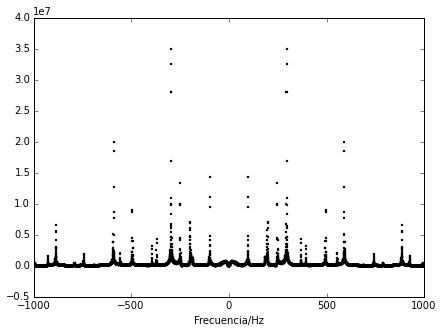

In [78]:
graf(freq, trans, "Frecuencia/Hz")

Debido a que este acorde se compone de 4 notas, es necesario entonces determinar las 4 frecuencias fundamentales que lo caracterizan. Para lograr esto, se hallarán sucesivamente la que presenta un máximo, se descartará y luego se hallará la del siguiente máximo.

In [79]:
#Primera frecuencia fundamental.
maximo = max(trans) #El máximo valor de las transformadas.
for i in range(len(trans)):
    if(trans[i] == maximo):
        frecuencia = np.round(freq[i], 3)
        print("Frecuencia Fundamental #1: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental #1: 295.855 Hz


In [80]:
#Segunda frecuencia fundamental
transF1 = []
freqF1 = []
lim1 = 1.5*10**7
for i in range(len(trans)):
    if(trans[i] < lim1):
        transF1.append(trans[i])
        freqF1.append(freq[i])
        
maximo2 = max(transF1)
for i in range(len(transF1)):
    if(transF1[i] == maximo2):
        frecuencia = np.round(freqF1[i], 3)
        print("Frecuencia Fundamental #2: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental #2: 98.086 Hz


In [81]:
#Tercera frecuencia fundamental
transF1 = []
freqF1 = []
lim1 = 1.4*10**7
for i in range(len(trans)):
    if(trans[i] < lim1):
        transF1.append(trans[i])
        freqF1.append(freq[i])
        
maximo2 = max(transF1)
for i in range(len(transF1)):
    if(transF1[i] == maximo2):
        frecuencia = np.round(freqF1[i], 3)
        print("Frecuencia Fundamental #3: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental #3: 248.409 Hz


In [82]:
#Tercera frecuencia fundamental
transF1 = []
freqF1 = []
lim1 = 0.5*10**7
for i in range(len(trans)):
    if(trans[i] < lim1):
        transF1.append(trans[i])
        freqF1.append(freq[i])
        
maximo2 = max(transF1)
for i in range(len(transF1)):
    if(transF1[i] == maximo2):
        frecuencia = np.round(freqF1[i], 3)
        print("Frecuencia Fundamental #4: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental #4: 589.658 Hz


In [196]:
result = zeros((3,3))
result[0] = [0.05, 0.15, 98.086]
result[1] = [0.05, 0.15, 248.409]
result[2] = [0.05, 0.15, 589.658]

2.1643761597
1.28759455988
0.6440402875951825
0.42985138090224345
0.854618794005
0.508415556602
0.6440402875951825
0.42985138090224345
0.360030729677
0.214183475845
0.6440402875951825
0.42985138090224345
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
22

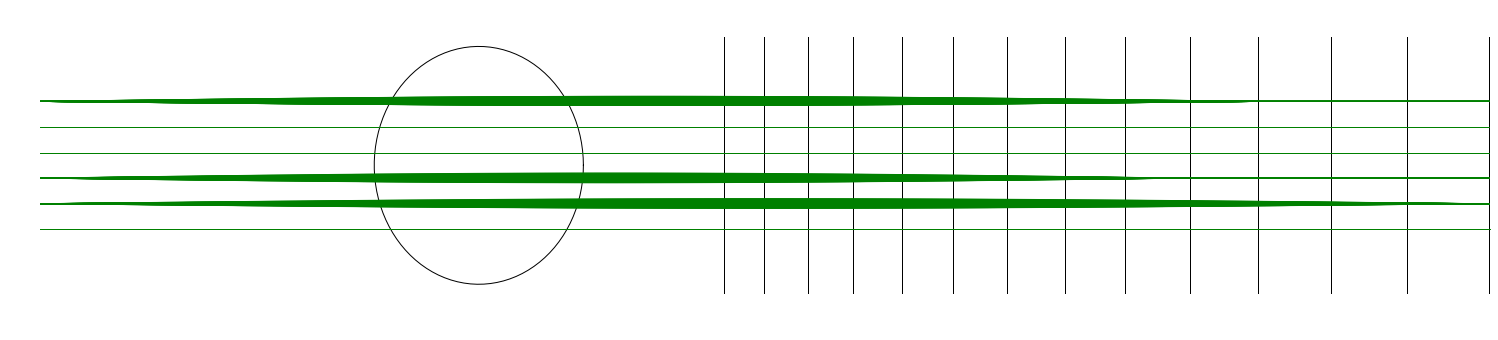

In [197]:
h1,h2,h3,h4,h5,h6=playGuitar(result,0,7)

figs=[]

x=linspace(0,2*pi,100)
fig2=figure(figsize(26,5.5))
xlim(0, tra0+0.001)
plot(rc*cos(x)+cc,rc*sin(x),c="black")
i=0
while(i<14):
    plot([trastes[i],trastes[i]],[-0.05,0.05],c='black')
    i+=1
plot([0,tra0],[0.005,0.005],"--",c="gray")
plot([0,tra0],[0.015,0.015],"--",c="gray")
plot([0,tra0],[0.025,0.025],"--",c="gray")
plot([0,tra0],[-0.005,-0.005],"--",c="gray")
plot([0,tra0],[-0.015,-0.015],"--",c="gray")
plot([0,tra0],[-0.025,-0.025],"--",c="gray")
axis("off" )
for i in range(len(h1)-2):

    print(i)
    plt2, =(plot(h1[i][0],h1[i][1],c='green'))
    plt3, =(plot(h2[i][0],h2[i][1],c='green'))
    plt4, =(plot(h3[i][0],h3[i][1],c='green'))
    plt5, =(plot(h4[i][0],h4[i][1],c='green'))
    plt6, =(plot(h5[i][0],h5[i][1],c='green'))
    plt7, =(plot(h6[i][0],h6[i][1],c='green'))
    
    figs.append(array([plt2,plt3,plt4,plt5,plt6,plt7]))

In [198]:
anim = animation.ArtistAnimation(fig2, figs, interval=1, repeat_delay=3000,blit=True)
anim.save('acorde.mp4',dpi=60)